# Import all the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix

# Import  the Dataset

In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Data Analysis

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [ ]:
# Mean of Age column
df.Age.mean()

29.69911764705882

In [ ]:
# median of Age column
df.Age.median()

28.0

In [ ]:
# mode of age of column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

<Axes: >

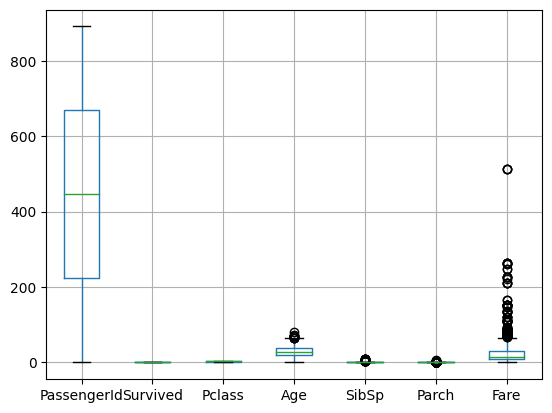

In [ ]:
# plot a boxplot to find out the outliers in the Age column
df.boxplot()

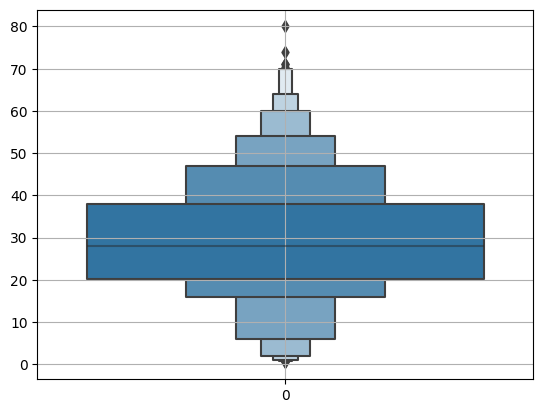

In [ ]:
sns.boxenplot(df.Age)
plt.grid()

In [ ]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
# Filling all the null values in the Age column
df.Age.fillna(value=df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# Changing the dtype of Age as int from float
df.Age=df.Age.astype(int)

In [ ]:
# Show the datapoint where the Embarked is null
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN


In [ ]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [ ]:
# Show all the Embarked value where the Pclass = 1
df.loc[df.Pclass==1,'Embarked']

1      C
3      S
6      S
11     S
23     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 216, dtype: object

In [ ]:
df.loc[df.Pclass==1,'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where the Pclass = 2
df.loc[df.Pclass==3,'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where the Pclass = 3
df.loc[df.Pclass==3,'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where the Fare = 80.0
df.loc[df.Fare==80.0,'Embarked'].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
# Show all the Embarked value where the Ticket = 113572
df.loc[df.Ticket==113572,'Embarked'].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
# Drop the rows where the Embarked =NaN
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(889, 11)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [ ]:
# Drop off the column - PassengerId, Name, Ticket
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace =True)

In [ ]:
df.Fare = round(df.Fare,2)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.0,S
1,1,1,0,38,1,0,71.0,C
2,1,3,0,26,0,0,8.0,S
3,1,1,0,35,1,0,53.0,S
4,0,3,1,35,0,0,8.0,S


# More EDA can be done - more plots,more graphs, more charts, more rate, percentage, etc.

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


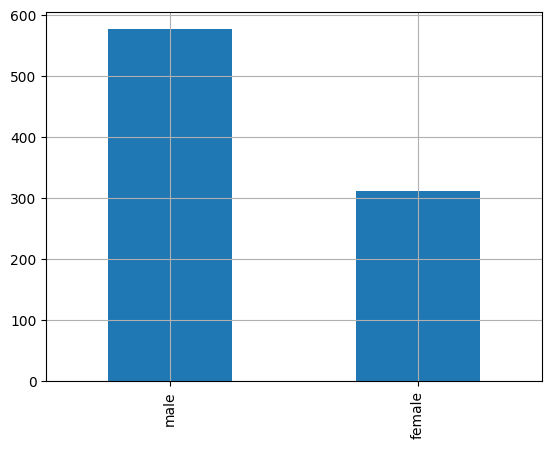

In [ ]:
# plot  a graph : Strength of Male v/s Strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

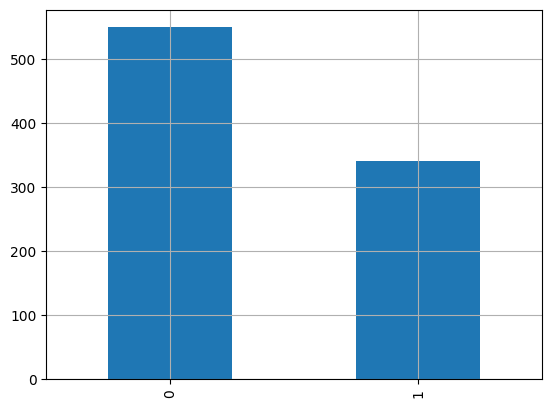

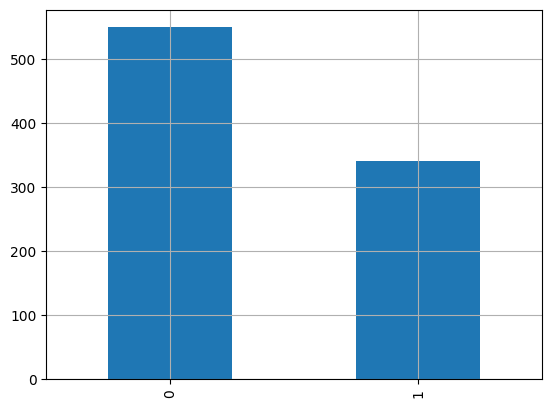

In [ ]:
# plot  a graph : Strength of Survived v/s Strength of Not Surived
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

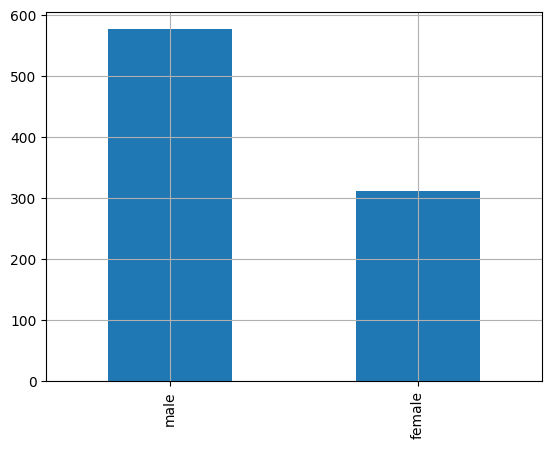

In [ ]:
# plot  a graph : Strength of Male v/s Strength of Female w.r.t Survived
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

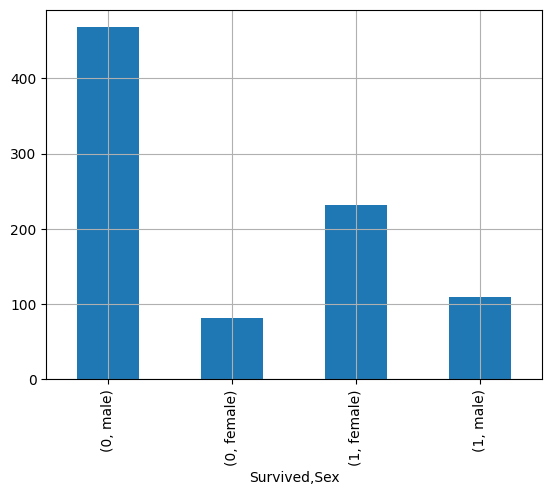

In [ ]:
# plot  a graph : Strength of Survived v/s Strength of Not Surived w.r.t Sex
df.Sex.groupby(df.Survived).value_counts().plot.bar(df.Sex)
plt.grid()

<Axes: xlabel='Survived', ylabel='count'>

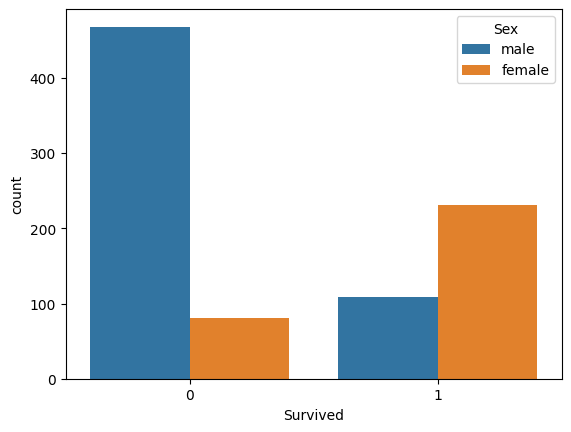

In [ ]:
# plot  a graph : Strength of Survived v/s Strength of Not Surived w.r.t Sex
sns.countplot(x='Survived',data=df,hue ='Sex')

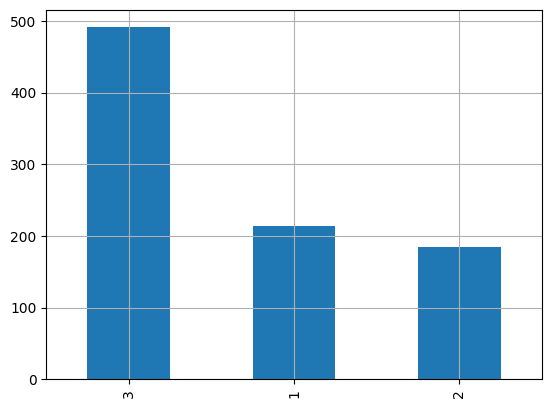

In [ ]:
# Plot a graph to find out the strength of Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

<Axes: xlabel='Survived', ylabel='count'>

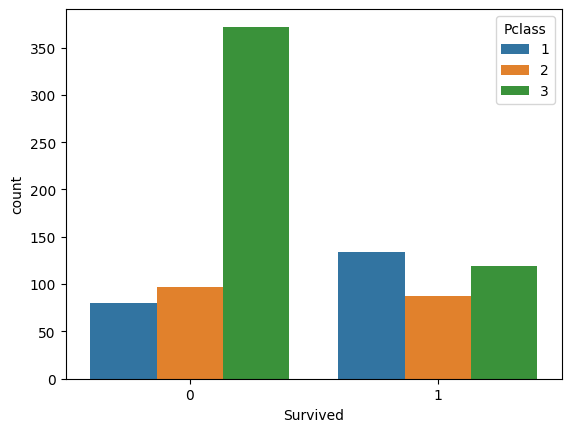

In [ ]:
# plot  a graph : Strength of Survived v/s Strength of Not Surived w.r.t Pclass
sns.countplot(x='Survived',data=df,hue ='Pclass')

# Encoders: To Convert the data frm the categorical form to numerical form without changing its meaning.

In [ ]:
# LabelEncoder for the column Sex
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Sex = enc.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [ ]:
# OneHotEncoder For the column Embarked

In [ ]:
new_df = df.copy()

In [ ]:
new_df = pd.get_dummies(new_df['Embarked'])

In [ ]:
new_df.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.0,S,0,0,1
1,1,1,0,38,1,0,71.0,C,1,0,0
2,1,3,0,26,0,0,8.0,S,0,0,1
3,1,1,0,35,1,0,53.0,S,0,0,1
4,0,3,1,35,0,0,8.0,S,0,0,1


In [ ]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.0,0,1
1,1,1,0,38,1,0,71.0,0,0
2,1,3,0,26,0,0,8.0,0,1
3,1,1,0,35,1,0,53.0,0,1
4,0,3,1,35,0,0,8.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 57.3 KB


<Axes: >

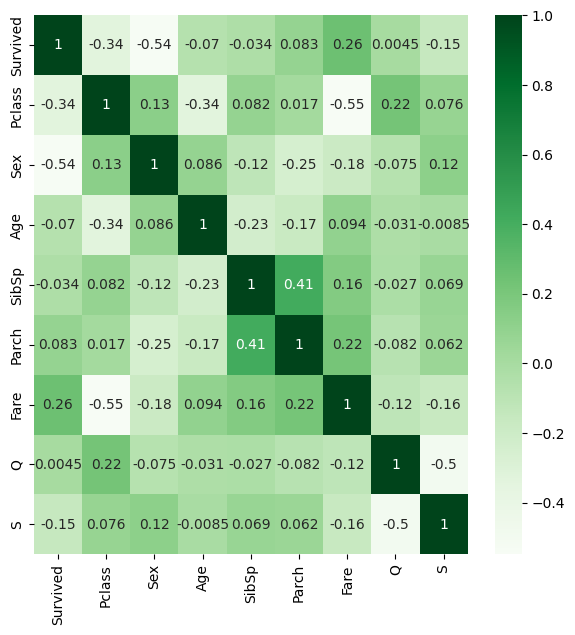

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

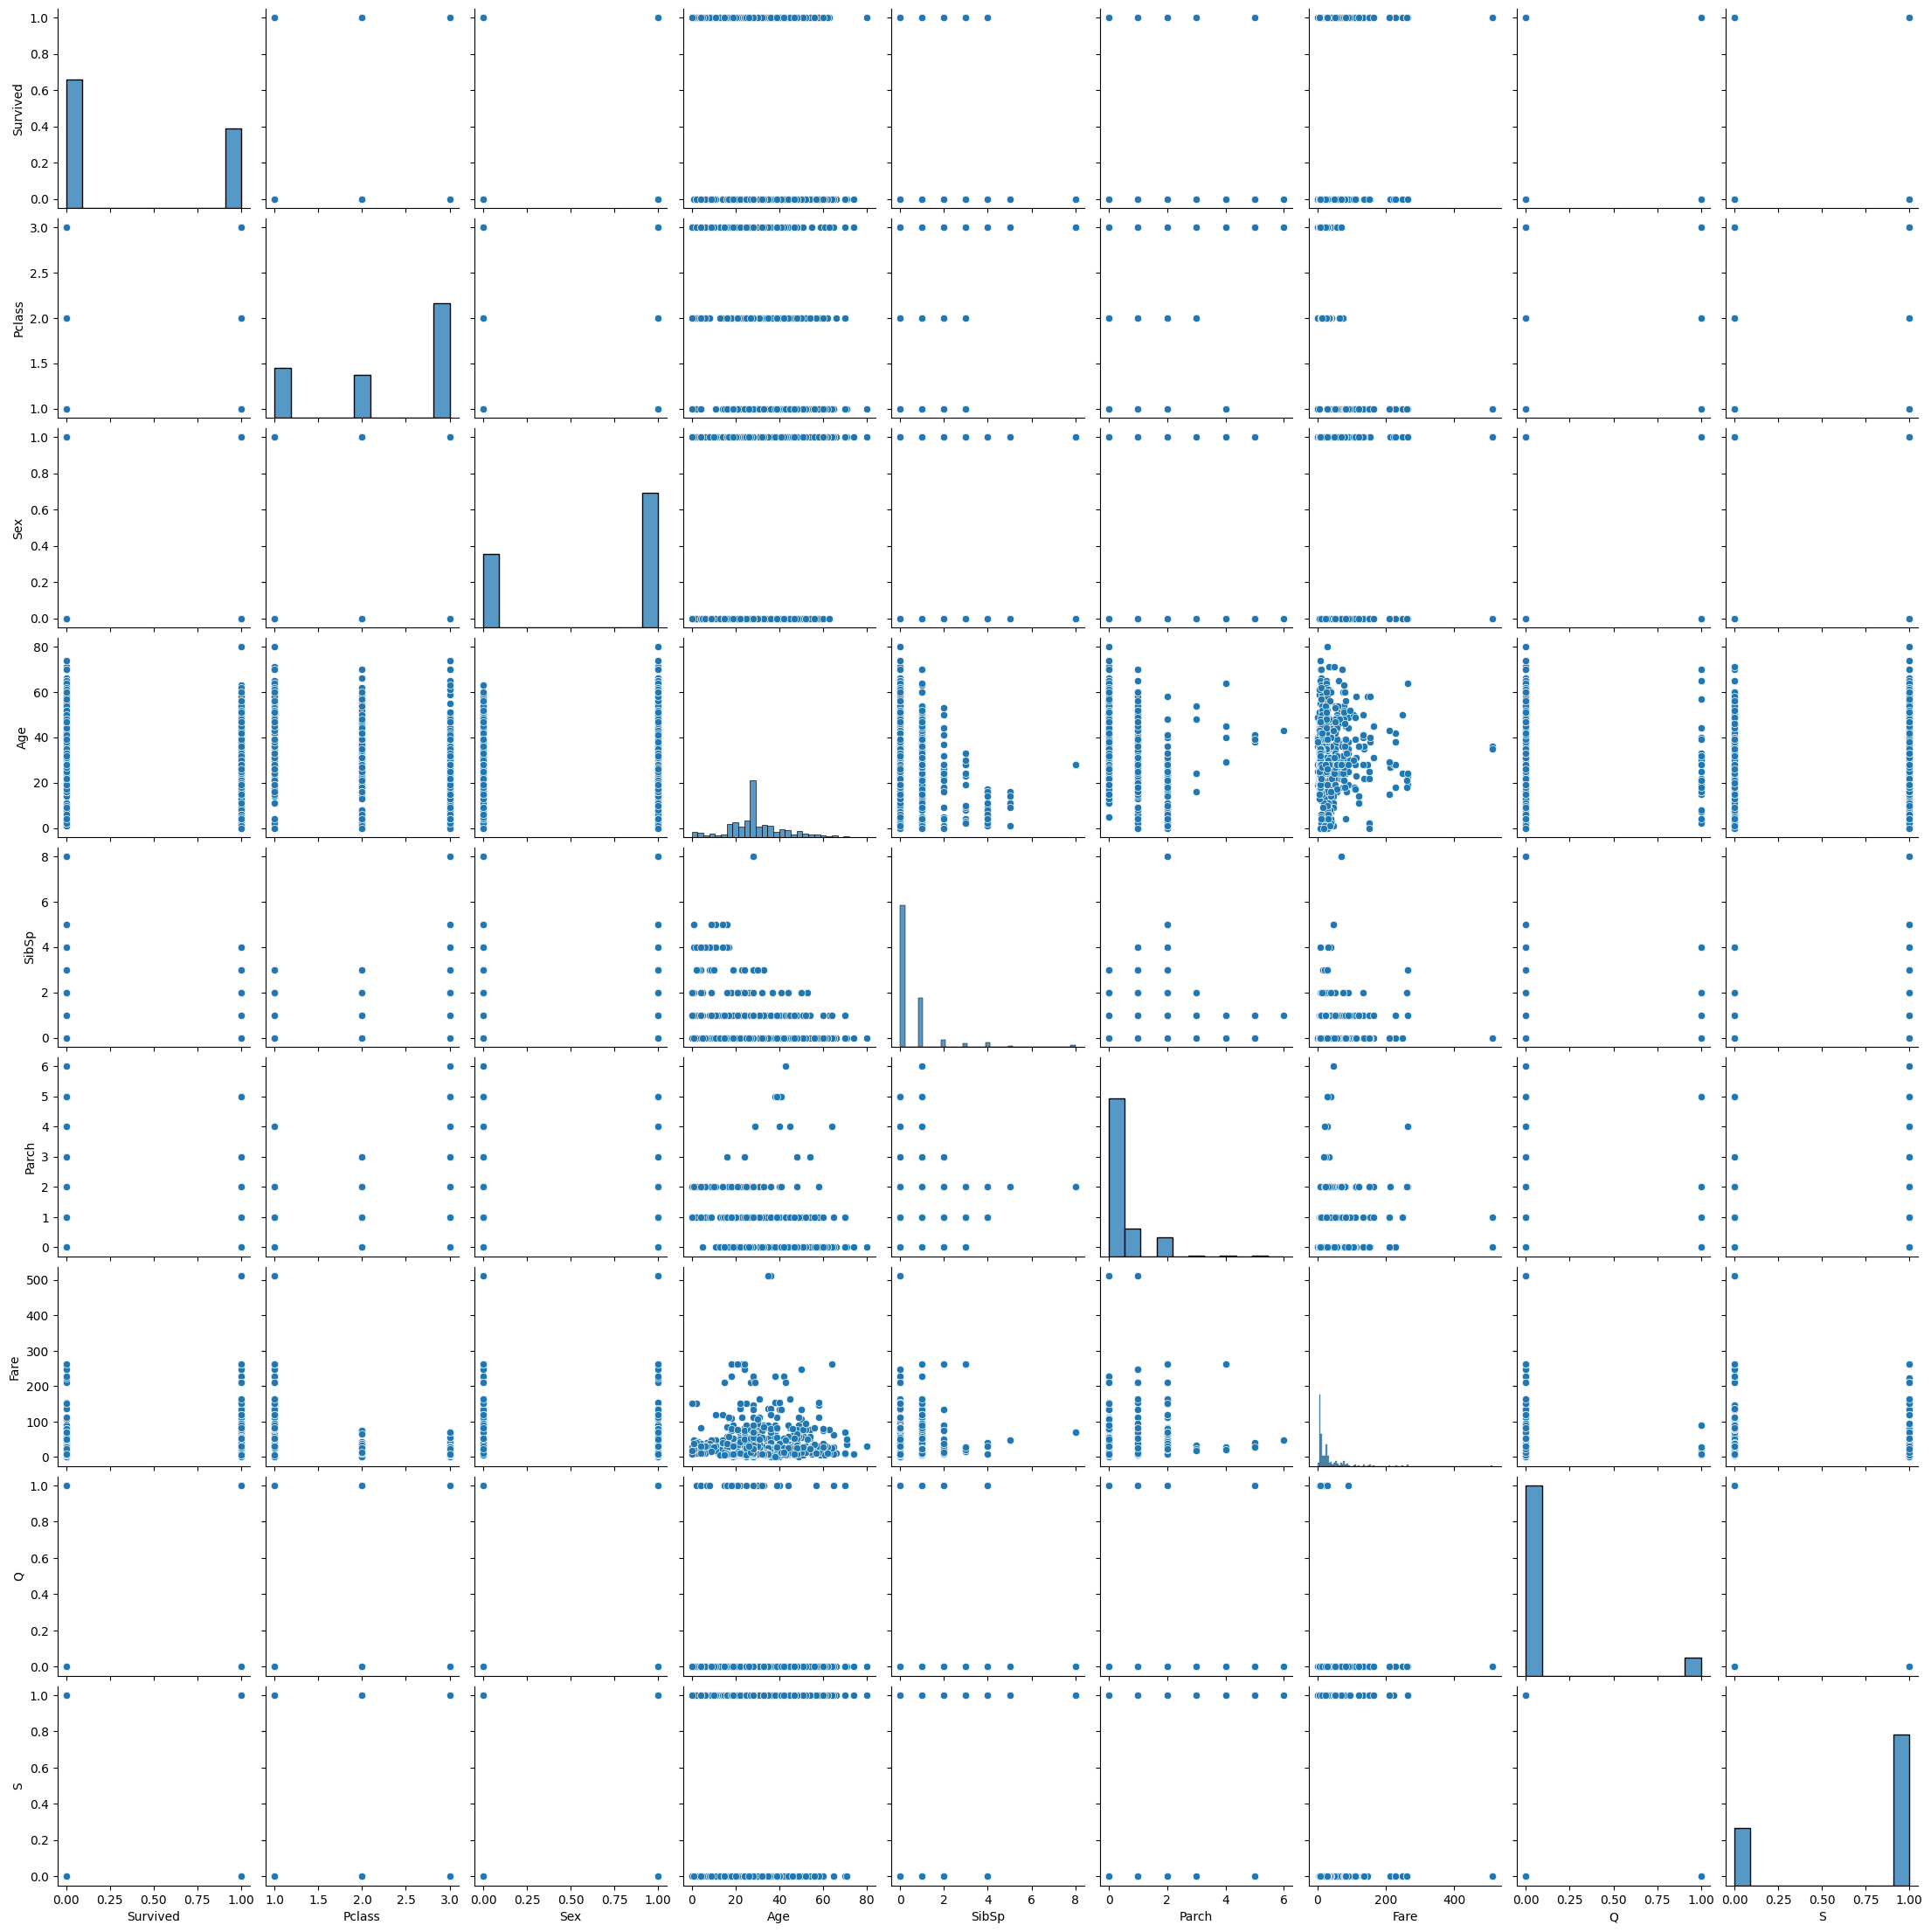

In [ ]:
sns.pairplot(df)

# Feature Importance

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.0,0,1
1,1,1,0,38,1,0,71.0,0,0
2,1,3,0,26,0,0,8.0,0,1
3,1,1,0,35,1,0,53.0,0,1
4,0,3,1,35,0,0,8.0,0,1


In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.0,0,1
1,1,0,38,1,0,71.0,0,0
2,3,0,26,0,0,8.0,0,1
3,1,0,35,1,0,53.0,0,1
4,3,1,35,0,0,8.0,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0,0,1
887,1,0,19,0,0,30.0,0,1
888,3,0,28,1,2,23.0,0,1
889,1,1,26,0,0,30.0,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat = ExtraTreesClassifier()

In [ ]:
feat.fit(x,y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.11225084, 0.3018275 , 0.26977703, 0.0473378 , 0.04713148,
       0.19052873, 0.00915088, 0.02199574])

# Feature Selection

<Axes: >

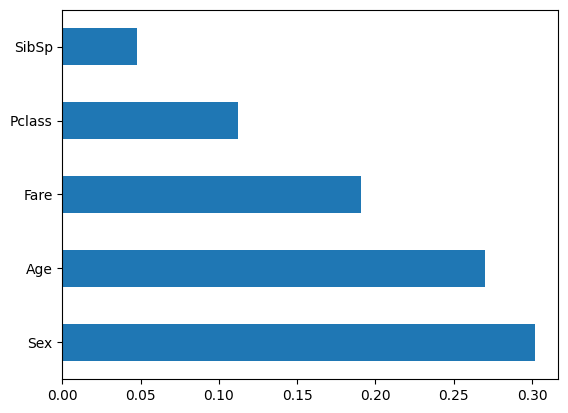

In [ ]:
feat_imp = pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')

# Splitting of the data

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
for train_index, test_index in skf.split(x,y):
  x_train, x_test = x.iloc[train_index],x.iloc[test_index]
  y_train, y_test = y.iloc[train_index],y.iloc[test_index]

In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.0,0,1
1,1,0,38,1,0,71.0,0,0
2,3,0,26,0,0,8.0,0,1
3,1,0,35,1,0,53.0,0,1
4,3,1,35,0,0,8.0,0,1
...,...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.0,0,1
715,3,1,19,0,0,8.0,0,1
718,3,1,28,0,0,16.0,1,0
719,3,1,33,0,0,8.0,0,1


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
706,2,0,45,0,0,14.0,0,1
707,1,1,42,0,0,26.0,0,1
708,1,0,22,0,0,152.0,0,1
709,3,1,28,1,1,15.0,0,0
710,1,0,24,0,0,50.0,0,0
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0,0,1
887,1,0,19,0,0,30.0,0,1
888,3,0,28,1,2,23.0,0,1
889,1,1,26,0,0,30.0,0,0


# Model Selection

In [ ]:
classifier = LogisticRegression()

# New Section

In [ ]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
final = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [ ]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

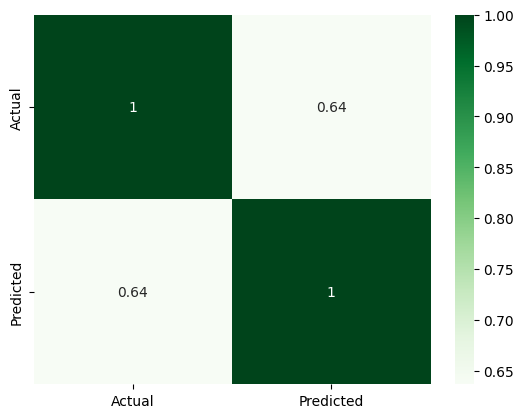

In [ ]:
sns.heatmap(final.corr(),annot=True,cmap='Greens')

# Performance Metric - Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)